In [1]:
import pandas as pd
data = pd.read_csv('household_power_consumption.txt', sep = ';') # read the data from the txt file
data.head()

C:\Users\artik\AppData\Local\Temp\ipykernel_26180\985722225.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('household_power_consumption.txt', sep = ';') # read the data from the txt file


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [2]:
data[data['Global_active_power'] == '?'] # check for missing values

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


EDA(Data Exploration)

In [3]:
data.info() # get the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [2]:
data.dropna(inplace = True) # drop the missing values

In [5]:
data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [6]:
data.isnull().sum() # check for missing values

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Duplicates Check-

In [7]:
data.duplicated().sum() # check for duplicates

np.int64(0)

Finding Outliers-

In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.date # convert the date column to date
data['Global_active_power'] = pd.to_numeric(data['Global_active_power']) # convert the column to numeric
data['Global_reactive_power'] = pd.to_numeric(data['Global_reactive_power']) # convert the column to numeric
data['Voltage'] = pd.to_numeric(data['Voltage']) # convert the column to numeric
data['Global_intensity'] = pd.to_numeric(data['Global_intensity']) # convert the column to numeric
data['Sub_metering_1'] = pd.to_numeric(data['Sub_metering_1']) # convert the column to numeric
data['Sub_metering_2'] = pd.to_numeric(data['Sub_metering_2']) # convert the column to numeric

C:\Users\artik\AppData\Local\Temp\ipykernel_26180\202039583.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [9]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [10]:
data.info() # get the information of the data

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 156.3+ MB


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

-0.3266649756878288


<Axes: ylabel='Voltage'>

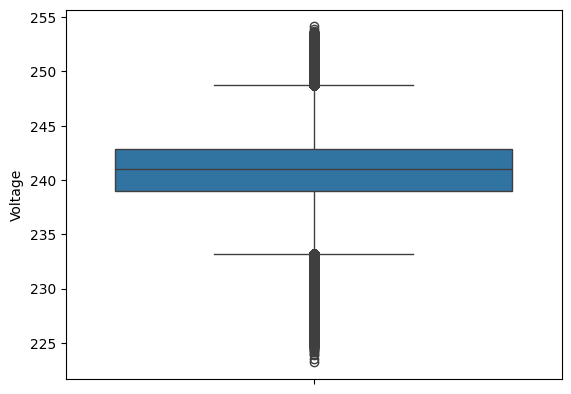

In [12]:
print(data['Voltage'].skew()) # check for skewness
sns.boxplot(data['Voltage']) # check for outliers

5.944541281563981


<Axes: ylabel='Sub_metering_1'>

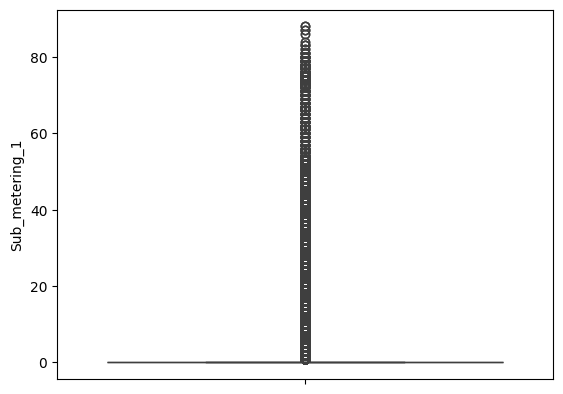

In [13]:
print(data['Sub_metering_1'].skew()) # check for skewness
sns.boxplot(data['Sub_metering_1'].astype(float)) # check for outliers

7.0905532303433985


<Axes: ylabel='Sub_metering_2'>

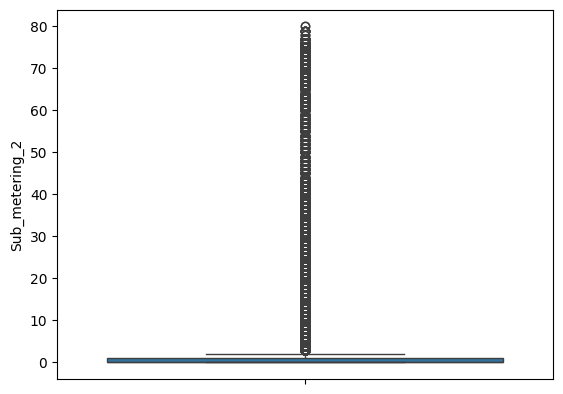

In [14]:
print(data['Sub_metering_2'].skew()) # check for skewness
sns.boxplot(data['Sub_metering_2'].astype(float)) # check for outliers

0.7246883225039495


<Axes: ylabel='Sub_metering_3'>

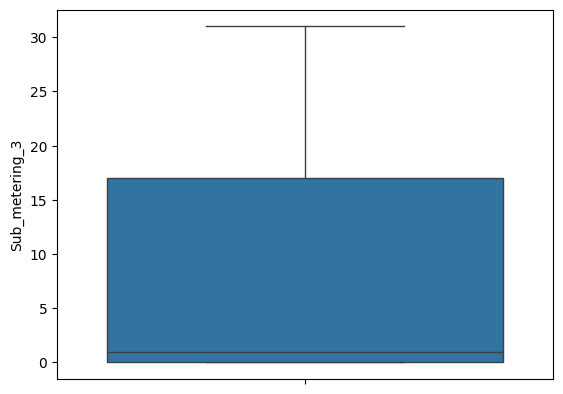

In [15]:
print(data['Sub_metering_3'].skew()) # check for skewness
sns.boxplot(data['Sub_metering_3'].astype(float)) # check for outliers

In [16]:
#data.iloc[:, 2:9].plot(kind='box', subplots=True, layout=(2, 4), sharex=False, sharey=False, figsize=(20, 10)) # check for outliers


Check correlation between the columns

<Axes: >

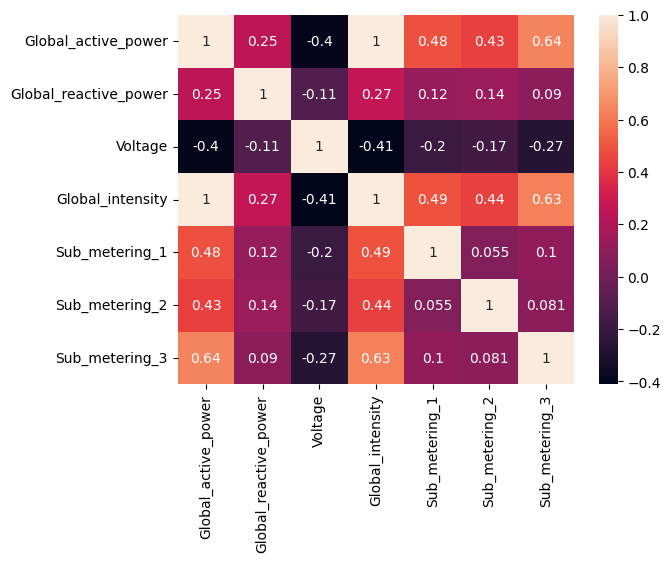

In [17]:
data.iloc[:, 2:].corr() # calculate the correlation between the columns
sns.heatmap(data.iloc[:, 2:].corr(), annot=True) # plot the heatmap of the correlation matrix

Normalize or Scale the Data

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.iloc[:, 2:] = scaler.fit_transform(data.iloc[:, 2:]) # standardize the data

Feature Selection

In [4]:
from sklearn.ensemble import RandomForestRegressor
fs = RandomForestRegressor(n_estimators = 100, random_state = 1)
fs.fit(data.iloc[:, 3:], data['Global_active_power']) # fit the model
importance = fs.feature_importances_ # get the importance of the features
pd.DataFrame(importance, index = data.columns[3:], columns = ['Importance']).sort_values(by = 'Importance', ascending = False) # display the importance of the features


,Importance
Global_intensity,0.998230
Voltage,0.000682
Global_reactive_power,0.000557
Sub_metering_1,0.000244
Sub_metering_3,0.000173
Sub_metering_2,0.000113


Component Analysis 

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data.iloc[:, 2:]) # fit the data to the PCA model
pca.explained_variance_ratio_ # get the explained variance ratio

array([4.61436521e-01, 1.41057598e-01, 1.33228219e-01, 1.21321205e-01,
       1.11773030e-01, 3.10782539e-02, 1.05173781e-04])

Split Data for training and testing

In [7]:
from sklearn.model_selection import train_test_split
var = data.iloc[:, 2:].drop(['Global_active_power'], axis = 1)
target = data['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(var, target, test_size = 0.2, random_state = 42)

Linear Regression Model 

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, mean_absolute_error

In [9]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print('Root Mean Squared Error:', root_mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Root Mean Squared Error: 0.038180962729158344
Mean Absolute Error: 0.024438739578847006
R2 Score: 0.9985500910441268


Random Forest Model

In [86]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Root Mean Squared Error:', root_mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Root Mean Squared Error: 0.03080605174170141
Mean Absolute Error: 0.01753830777293365
R2 Score: 0.9990561150450549


In [10]:
import pickle
with open('linear_regressor.pkl', 'wb') as file:
    pickle.dump(model1, file) # save the model to a file


In [11]:
with open('linear_regressor.pkl', 'rb') as file:
    model = pickle.load(file) # load the model from a file
y_pred = model.predict(X_test)
print('Root Mean Squared Error:', root_mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred)) 

Root Mean Squared Error: 0.038180962729158344
Mean Absolute Error: 0.024438739578847006
R2 Score: 0.9985500910441268


Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Root Mean Squared Error:', root_mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Root Mean Squared Error: 0.032462189454864815
Mean Absolute Error: 0.020336737231983194
R2 Score: 0.9989519002950156


XgBoost Model

In [26]:
import xgboost as xgb
model2 = xgb.XGBRegressor()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print('Root Mean Squared Error:', root_mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Root Mean Squared Error: 0.029109538780786235
Mean Absolute Error: 0.017220134312827744
R2 Score: 0.9991572133813096


Neural Network

In [17]:
from sklearn.neural_network import MLPRegressor
model3 = MLPRegressor()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
print('Root Mean Squared Error:', root_mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Root Mean Squared Error: 0.030097154370970505
Mean Absolute Error: 0.01808591847407655
R2 Score: 0.9990990558819076
